In [473]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datashader as ds
import colorcet as cc
import folium
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

from collections import defaultdict, OrderedDict
from folium.plugins import HeatMapWithTime
from datetime import datetime

In [400]:
#Loading the dataset
df = pd.read_csv(r'C:\Users\yfcuk\OneDrive\Desktop\ZomatoBangaloreRestaurants\zomato.csv')

In [492]:
df.head()

,address,name,online_order,book_table,rate,votes,rest_type,cuisines,cost,reviews_list,type,city,Number_of_cuisines_offered
location,,,,,,,,,,,,,
Banashankari,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,3
Banashankari,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,3
Banashankari,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,3
Banashankari,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,2
Basavanagudi,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,2


In [493]:
df.tail()

,address,name,online_order,book_table,rate,votes,rest_type,cuisines,cost,reviews_list,type,city,Number_of_cuisines_offered
location,,,,,,,,,,,,,
Whitefield,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar N Grill,False,False,3.7,34,"Casual Dining, Bar","North Indian, Continental",800.0,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",Pubs and bars,Whitefield,2
Whitefield,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,False,False,2.5,81,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800.0,"[('Rated 4.0', 'RATED\n A fine place to chill...",Pubs and bars,Whitefield,4
Whitefield,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points By Sheraton Bengaluru...,False,False,3.6,27,Bar,Continental,1.5,"[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars,Whitefield,1
"ITPL Main Road, Whitefield",Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,False,True,4.3,236,Bar,Finger Food,2.5,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars,Whitefield,1
"ITPL Main Road, Whitefield","ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,False,False,3.4,13,"Bar, Casual Dining","Finger Food, North Indian, Continental",1.5,"[('Rated 5.0', 'RATED\n Great ambience , look...",Pubs and bars,Whitefield,3


In [403]:
#Information about the dataset, datatypes of columns and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [404]:
df.shape

(51717, 17)

In [405]:
#Data Cleaning and Transformation

In [406]:
#Removing the unnecessary columns
df=df.drop(['url','dish_liked','phone','menu_item'],axis=1)

In [407]:
#Reading the columns
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [408]:
#Deleting the duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [409]:
#Deleting the NAN values from the dataset
df.isnull().sum()
df.dropna(how='any',inplace=True)

In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43494 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      43494 non-null  object
 1   name                         43494 non-null  object
 2   online_order                 43494 non-null  object
 3   book_table                   43494 non-null  object
 4   rate                         43494 non-null  object
 5   votes                        43494 non-null  int64 
 6   location                     43494 non-null  object
 7   rest_type                    43494 non-null  object
 8   cuisines                     43494 non-null  object
 9   approx_cost(for two people)  43494 non-null  object
 10  reviews_list                 43494 non-null  object
 11  listed_in(type)              43494 non-null  object
 12  listed_in(city)              43494 non-null  object
dtypes: int64(1), object(12)
memory 

In [411]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [412]:
df.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [413]:
#Changing the columns names
df = df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)':'city'})

df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list', 'type',
       'city'],
      dtype='object')

In [414]:
#Transformations

#Changing the cost to string
df['cost'] = df['cost'].astype(str)

#Using lambda function to replace ',' from cost
df['cost'] = df['cost'].apply(lambda x: x.replace(',','.'))    

#Changing the cost to float                                      
df['cost'] = df['cost'].astype(float)
df.info()   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43494 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       43494 non-null  object 
 1   name          43494 non-null  object 
 2   online_order  43494 non-null  object 
 3   book_table    43494 non-null  object 
 4   rate          43494 non-null  object 
 5   votes         43494 non-null  int64  
 6   location      43494 non-null  object 
 7   rest_type     43494 non-null  object 
 8   cuisines      43494 non-null  object 
 9   cost          43494 non-null  float64
 10  reviews_list  43494 non-null  object 
 11  type          43494 non-null  object 
 12  city          43494 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 4.6+ MB


In [415]:
#Reading rate of dataset
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [416]:
#Removing '/5' from rates
df = df.loc[df.rate !='NEW']
df = df.loc[df.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
df.rate = df.rate.apply(remove_slash).str.strip().astype('float')
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [458]:
#Adjust the column names
df.name = df.name.apply(lambda x: x.title())
df.online_order.replace(('Yes','No'),(True, False),inplace=True)
df.book_table.replace(('Yes','No'),(True, False),inplace=True)
df.cost.unique()

array([800.  , 300.  , 600.  , 700.  , 550.  , 500.  , 450.  , 650.  ,
       400.  , 900.  , 200.  , 750.  , 150.  , 850.  , 100.  ,   1.2 ,
       350.  , 250.  , 950.  ,   1.  ,   1.5 ,   1.3 , 199.  ,   1.1 ,
         1.6 , 230.  , 130.  ,   1.7 ,   1.35,   2.2 ,   1.4 ,   2.  ,
         1.8 ,   1.9 , 180.  , 330.  ,   2.5 ,   2.1 ,   3.  ,   2.8 ,
         3.4 ,  50.  ,  40.  ,   1.25,   3.5 ,   4.  ,   2.4 ,   2.6 ,
         1.45,  70.  ,   3.2 , 240.  ,   6.  ,   1.05,   2.3 ,   4.1 ,
       120.  ,   5.  ,   3.7 ,   1.65,   2.7 ,   4.5 ,  80.  ])

In [418]:
!pip install plotly

In [419]:
df["cuisines"]

0                     North Indian, Mughlai, Chinese
1                        Chinese, North Indian, Thai
2                             Cafe, Mexican, Italian
3                         South Indian, North Indian
4                           North Indian, Rajasthani
                            ...                     
41228                      North Indian, Continental
41229    Andhra, South Indian, Chinese, North Indian
41230                                    Continental
41231                                    Finger Food
41232         Finger Food, North Indian, Continental
Name: cuisines, Length: 41233, dtype: object

In [420]:
df['Number_of_cuisines_offered'] = df['cuisines'].apply(lambda x : len(x.split(',')))

In [421]:
df

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,type,city,Number_of_cuisines_offered
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,3
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,3
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,3
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,2
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41228,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar N Grill,False,False,3.7,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800.0,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",Pubs and bars,Whitefield,2
41229,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,False,False,2.5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800.0,"[('Rated 4.0', 'RATED\n A fine place to chill...",Pubs and bars,Whitefield,4
41230,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points By Sheraton Bengaluru...,False,False,3.6,27,Whitefield,Bar,Continental,1.5,"[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars,Whitefield,1
41231,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,False,True,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2.5,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars,Whitefield,1


In [422]:
### Which restaurants are working at different locations in Bangalore?

<function matplotlib.pyplot.show(close=None, block=None)>

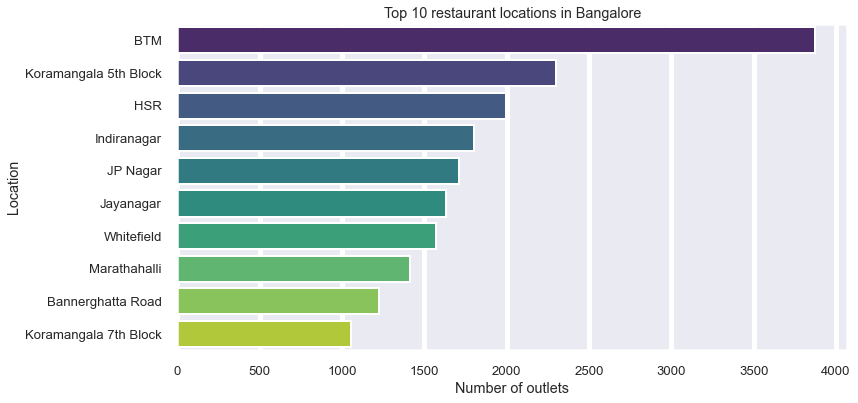

In [452]:
# Countplot of different locations
plt.figure(figsize = (12,6))
sns.set_style('darkgrid')
ch = df['location'].value_counts()[:10]

sns.barplot(x= ch,y = ch.index,palette = 'viridis')
plt.title('Top 10 restaurant locations in Bangalore')
plt.xlabel('Number of outlets')
plt.ylabel('Location')
plt.show

In [424]:
## BTM is the best location in Bangalore, around 3800 restaurnats are there in this location 
## followed by Koramangala 5th block has 2300 restaurants and HSR has almost 2000 restaurants.

In [425]:
### What types of cuisines are most popular?

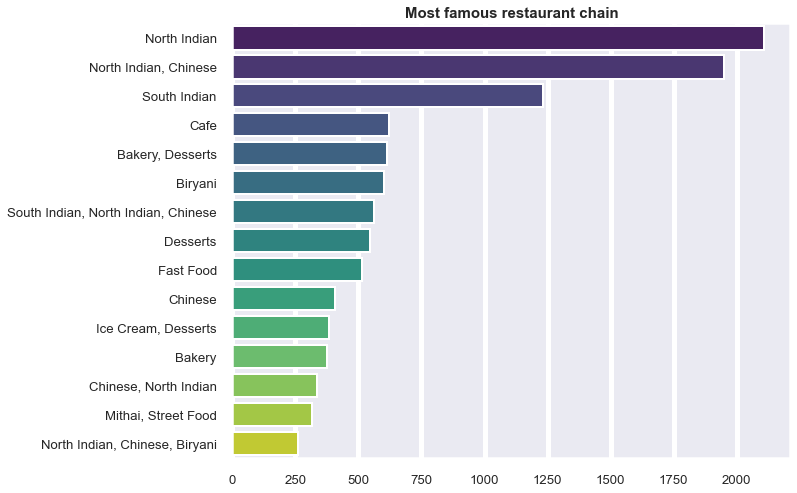

In [426]:

plt.figure(figsize=(10,8))
df_cuisines = df['cuisines'].value_counts()[:15]
sns.barplot(x = df_cuisines.values, y=df_cuisines.index, palette = 'viridis')
plt.title('Most famous restaurant chain', fontsize=15, fontweight='bold')
plt.show()

In [427]:
## Bangalore has the South Indian culture but it seems it is more influenced by North Indian culture more than south. 
## North Indian being first and North Indian Chinese at 2nd are the most famous cuisines among all the restaurants.

In [428]:
### How many restaurants provides both online ordering and table booking ?

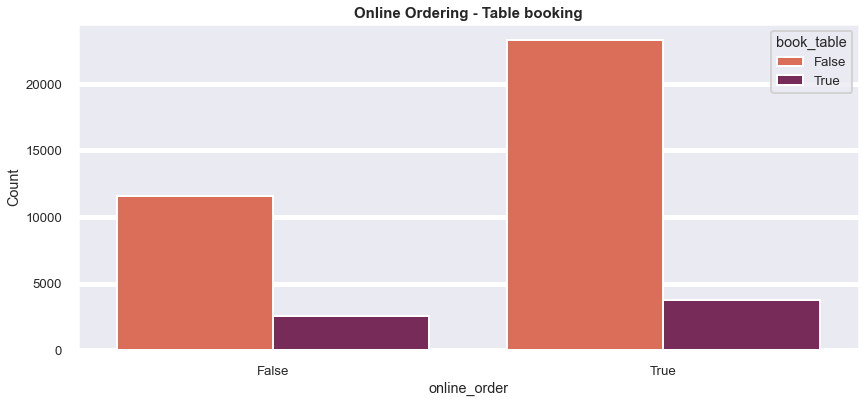

In [429]:
df_online_booking = df.groupby(["online_order", "book_table"]).size().reset_index(name = "Count")
plt.figure(figsize = (14,6))
sns.barplot(x="online_order", y="Count", hue="book_table", palette='rocket_r', data=df_online_booking)
plt.title("Online Ordering - Table booking", fontsize=15, fontweight='bold')
plt.show()


In [430]:
### What type of restaurants are more in Bangalore?

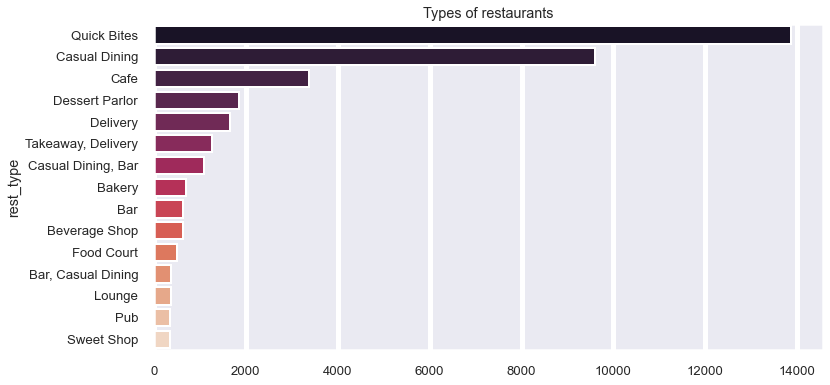

In [431]:
plt.figure(figsize = (12,6))

rt = df['rest_type'].value_counts()[:15]
sns.barplot(x= rt,y = rt.index,palette = 'rocket')
plt.xlabel('')
plt.ylabel('rest_type')
plt.title('Types of restaurants')
plt.show()

In [432]:
## Quick Bites restaurants are more compare to all other types of restaurants.

In [433]:
### What are the most common average ratings of restaurants?

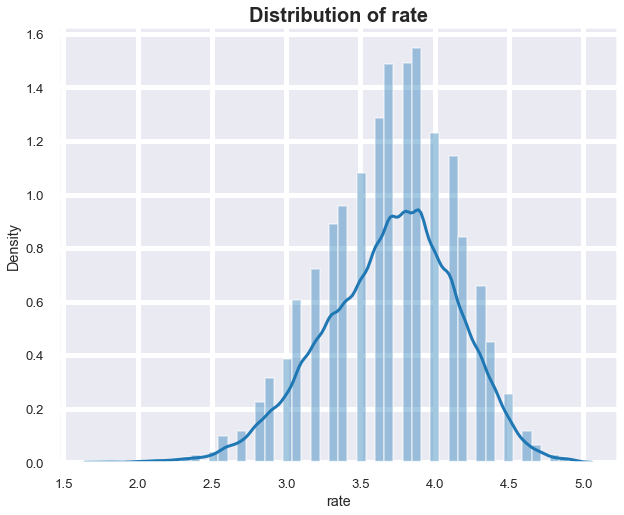

In [434]:
plt.figure(figsize = (10, 8))
sns.distplot(df['rate'])
plt.title("Distribution of rate", fontsize=20, fontweight='bold')
plt.show()

In [435]:
### How many restaurants allow table booking and how many doesn't allow?

Text(0.5, 1.0, 'Restaurants allowing table booking or not')

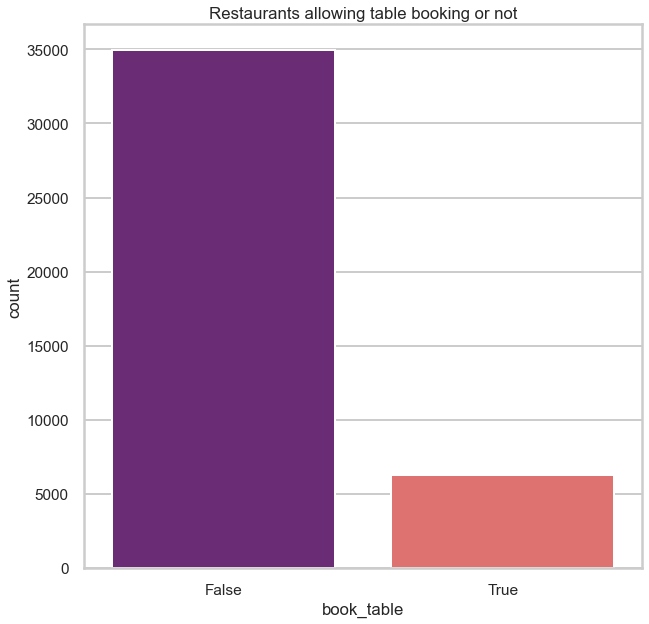

In [548]:
sns.countplot(df['book_table'], palette="magma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants allowing table booking or not')

In [437]:
## Almost 35000 restaurants allows online table booking while 6000 restarants does'nt allow.

In [441]:
### What is the most common restaurant dining type?

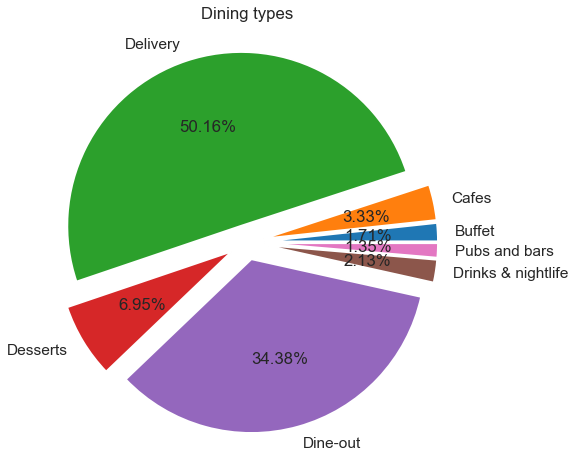

In [547]:
sns.set_context("poster", font_scale = 0.7, rc={"grid.linewidth": 2})
sns.set_style('whitegrid')
plt.figure(figsize=(20,8))
explode = [0.1,0.1,0.1,0.1,0.1,0.1,0.1]
values=[882,1723,25942,3593,17779,1101,697]
labels= ['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out', 'Drinks & nightlife', 'Pubs and bars']
plt.pie(values, labels=labels, autopct='%1.2f%%', counterclock=True, explode=explode)
plt.title('Dining types')
plt.show()

In [443]:
## Delivery is the most common restaurants dining type followed by Dine-out at second.

In [444]:
### Does the online order affects the overall ratings compared to the restaurants not allowing to order online?

Text(0.5, 1.0, 'Rate vs Online order')

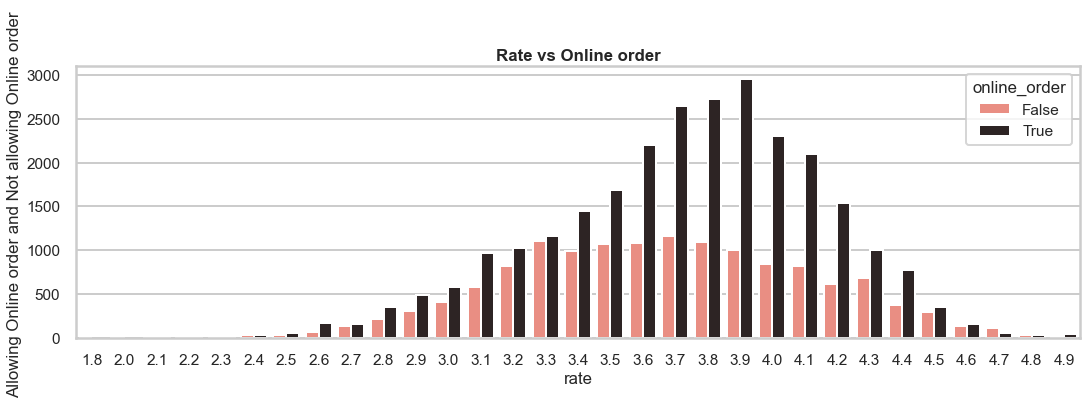

In [546]:
plt.figure(figsize = (18,5))
sns.countplot(x=df['rate'], hue = df['online_order'],palette="dark:salmon_r")
plt.ylabel("Allowing Online order and Not allowing Online order ")
plt.title("Rate vs Online order",weight = 'bold')

In [446]:
## Online order affects the ratings as per the observations made above.
## The restaurants accepting orders online are having a better rating as compared to the restaurants which are not providing the online order service.

In [447]:
### Does the approx cost for two people affects the rating of restaurants?

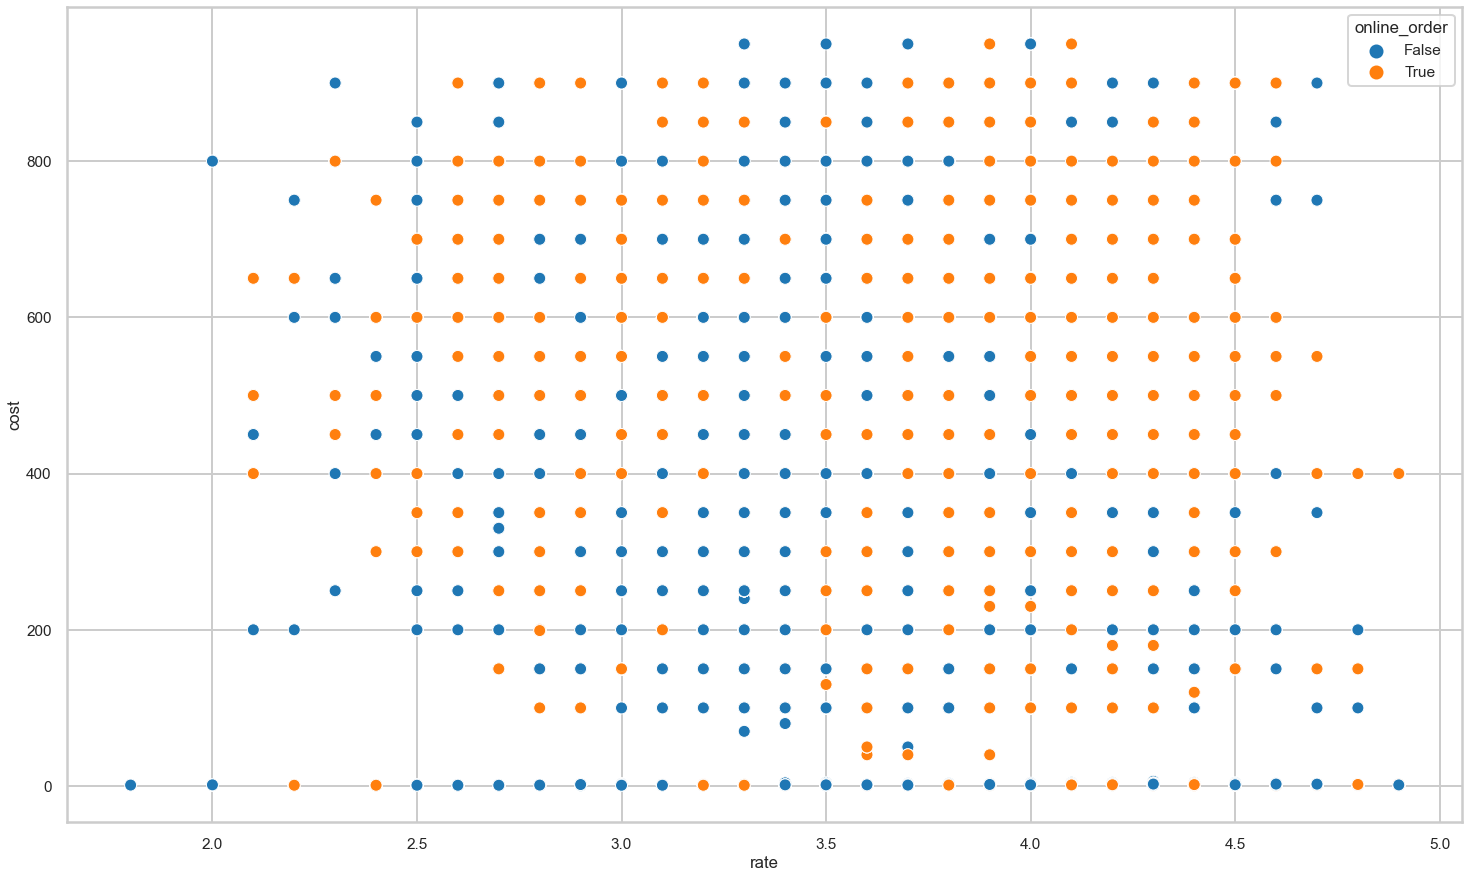

In [545]:
plt.figure(figsize=(25,15))
sns.scatterplot(x="rate",y='cost',hue='online_order',data=df)
plt.show()

In [ ]:
## We can conclude from the scatterplot that most of the highest rated accepts online order and they fits in budget also.

In [543]:
### Are restaurants allowing online ordering are more affordable?

In [544]:
fig = px.box(df,x='online_order',y='cost')
fig.show()

In [ ]:
## Restaurants accepting online orders are more affordable than Restaurants who are not accepting online orders.